## How to Query and Plot data from the Gaia Sattelite Database?</h1>

Here are some useful links 
- [European Space Agency Gaia Mission - Writing Queries Turorial](https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries)
- [Gaia's Hertzsprung-Russel Diagram](https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram)

In the examples below we will query ***half-a-million stars within 200 Parsecs of the sun and plot it in a Hertzsprung-Russel Diagram (HRD)***


In [1]:
#!echo $PATH  # for debugging as needed

In [2]:
# Data Folder
data_folder="data_folder"
!ls -l {data_folder}

total 4
drwxr-xr-x 2 jupyter-chandru jupyter-chandru 4096 Nov 18 01:35 'Untitled Folder'


In [3]:
#!pip list  # for debugging as needed

In [4]:
#EXECUTE THIS CELL THEN RESTART KERNEL
#!pip install astroquery  # for debugging as needed

In [5]:
# Create Access to the Gaia Database
from astroquery.gaia import Gaia

# Load Tables from the Gai Database
tables = Gaia.load_tables(only_names=True)

# Print the Table Names in the Gaia Database
for table in tables:
    print(table.name)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaia

In [6]:
# Get Gaia Sources Table
meta = Gaia.load_table('gaiadr2.gaia_source')
print(meta)

Retrieving table 'gaiadr2.gaia_source'
TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 95


In [7]:
# Print all columns in the Gaia Source Table
for column in meta.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

In [8]:
# Create a Synchronous (immediate submit) Query Job 
# for just the top 10 rows from the table retrieving
# columns source_id, ra, dec, parallax (How did I know the column names ??)
# note that it validates and gives you the units, description and bad rows!
query1 = """SELECT 
TOP 10
source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source
"""
job1 = Gaia.launch_job(query1)
job1
print(job1)

<Table length=10>
   name    dtype  unit                            description                             n_bad
--------- ------- ---- ------------------------------------------------------------------ -----
source_id   int64      Unique source identifier (unique within a particular Data Release)     0
       ra float64  deg                                                    Right ascension     0
      dec float64  deg                                                        Declination     0
 parallax float64  mas                                                           Parallax     1
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1668735341936O-result.vot.gz
Results: None


In [9]:
# This statement below retrieves the result (note only 10 rows retrieved because that is what we asked for!)
results = job1.get_results()
results

source_id,ra,dec,parallax
,deg,deg,mas
int64,float64,float64,float64
4243332511975918592,304.09455533555916,2.441323389933233,-0.13945405901420282
4243319219050679424,304.1686005270349,2.3672245638822322,0.5733693934686754
4243410409796187520,305.09308579533223,2.9097702429728516,--
4243317191828451456,304.41257120187015,2.3663683051256355,0.7896950434950573
4243382024357296768,305.02234723889535,2.5621225813846435,0.2054928242561274
4243316435911870720,304.2490480545997,2.348076531440825,1.184637693324672
4243371720730333952,304.3608280207523,2.7847819451639517,0.8785722864124084
4243396318010095744,305.0733128326968,2.681387830575093,1.786026035232414


In [10]:
# Create a Asynchronous (scheduled submit) Query Job
# for just the top 2000 rows from the table retrieving
# columns source_id, ra, dec, pmra, pmdec, parallax, bp_rp 
# with a WHERE clause
# note that it validates and gives you the units, description and bad rows!
# What does Parallax < 1 mean in terms of distance ??  d = 1/p
query2 = """SELECT 
TOP 2000
source_id, ra, dec, pmra, pmdec, parallax, bp_rp
FROM gaiadr2.gaia_source
WHERE parallax < 1 and parallax > 0
"""
job2 = Gaia.launch_job_async(query2)
print(job2)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=2000>
   name    dtype    unit                              description                             n_bad
--------- ------- -------- ------------------------------------------------------------------ -----
source_id   int64          Unique source identifier (unique within a particular Data Release)     0
       ra float64      deg                                                    Right ascension     0
      dec float64      deg                                                        Declination     0
     pmra float64 mas / yr                         Proper motion in right ascension direction     0
    pmdec float64 mas / yr                             Proper motion in declination direction     0
 parallax float64      mas                                                           Parallax     0
    bp_rp float32      mag                                                     BP - RP colour   168
Jobid: 1668735352253O
Phase: C

In [ ]:
# This statement below retrieves the result (note 2000 rows retrieved because that is what we asked for!)
results = job2.get_results()
results

In [20]:
# Here I am defining a python function to execute a asynchronous query which I can then pass to a Job
def send_radial_new_gaia_query(query_size=500, distance=200, **kwargs):
    """
    Sends an archive query for d < 200 pc, with additional filters taken from
    Gaia Data Release 2: Observational Hertzsprung-Russell diagrams (Sect. 2.1)
    Gaia Collaboration, Babusiaux et al. (2018)
    (https://doi.org/10.1051/0004-6361/201832843)

    NOTE: 10000000 is a maximum query size (~76 MB / column)

    Additional keyword arguments are passed to Gaia.launch_job_async method.
    """
    query3 = (" SELECT"
            " TOP {}".format(query_size)+
#            " source_id, ra, dec, pmra, pmdec, parallax, bp_rp, phot_g_mean_mag+5*log10(parallax)-10 as mg, 1000/parallax as dist"
            " source_id, ra, dec, pmra, pmdec, parallax, bp_rp, phot_g_mean_mag, 1000/parallax as dist"
            " FROM gaiadr2.gaia_source"
            " WHERE parallax > 0"
            " AND bp_rp > -0.75"
            " AND bp_rp < 2"
            " AND 1000/parallax <= {}".format(distance)
    )
    job = Gaia.launch_job_async(query3, **kwargs)
    return job

In [21]:
job3 = send_radial_new_gaia_query(query_size=10000,distance=200)  # Query 10000 alhough default is 500 stars
results = job3.get_results()
results

INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,parallax,bp_rp,phot_g_mean_mag,dist
,deg,deg,mas / yr,mas / yr,mas,mag,mag,
int64,float64,float64,float64,float64,float64,float32,float32,float64
5958932738587053824,263.43993702712055,-42.46909007141257,-5.065674786264608,5.959195311002349,6.2114328735395326,1.3778839,17.649157,160.99344875156936
4154261148041785088,276.3737880935989,-10.612384486495172,1.9032007036429812,-1.306126537166243,6.323185810211738,1.1957417,20.546534,158.14812817694408
4154247434194911232,276.07794971756005,-10.718110479507244,6.3204961286416825,-4.338716166043315,5.868170278934157,1.9402628,14.292905,170.41086956693275
4317902425685081984,293.4203292310312,13.711808659763413,-0.957691646872086,-5.128996997277348,5.696577211628671,1.9452553,20.268414,175.5440087705046
4317928917053929216,293.4215144953913,14.048555654874148,-1.1528467756308907,-8.32371693821019,6.062215949853539,1.7681427,20.62104,164.9561824045809
5822339687452346112,237.86294837652682,-66.64042868721491,-30.618683510364594,18.815069884974367,15.071021002915675,1.1967373,20.602522,66.35250523548058
4317905518064386304,293.7442738551426,13.748593267711293,-4.572728219172291,-7.782872644878806,7.922082728774197,1.6529102,20.425602,126.22943160740414
4317933040225901312,293.8860384175224,13.946591909420563,-8.761265008027177,-4.153067166409391,6.998206121653696,1.3160477,20.552246,142.89376200364003


In [22]:
!ls -l data_folder

total 4
drwxr-xr-x 2 jupyter-chandru jupyter-chandru 4096 Nov 18 01:35 'Untitled Folder'


In [24]:
# Here I am defining a job for the same asynchronous within a try-except block
# This will first look for a previously stored file (try-block)
# if it does not exist it will execute the query (except-block)
# It will also compute the abs magnitude using the magnitude equation

import math
import numpy as np
from astropy import log

num_stars = 10000
small_datafile_name = data_folder+"/gaia-hrd-dr2-200pc_%d_stars.csv" % (num_stars)
try:
    log.info(f"Getting the DR2 results on nearby (d < 200 pc) stars stored in {small_datafile_name}\n")
    gaiarec = np.recfromcsv(small_datafile_name)
#    bp_rp, mg, dist = gaiarec.bp_rp, gaiarec.mg, gaiarec.dist
    bp_rp, photmg, dist, plx = gaiarec.bp_rp, gaiarec.phot_g_mean_mag, gaiarec.dist, gaiarec.parallax
    print(f"reading OLD results from previously existng {small_datafile_name}\n")
    mg = photmg+5*np.log10(plx)-10
    print(bp_rp, mg, dist)
except OSError:
    job4 = send_radial_new_gaia_query(dump_to_file=True, output_format="csv",
                                 output_file=small_datafile_name,
                                 query_size=num_stars,distance=200)
    results = job4.get_results()
    bp_rp = results['bp_rp'].data
    plx = results['parallax'].data
#    mg = results['mg'].data
    mg = results['phot_g_mean_mag']+5*np.log10(plx)-10
    dist = results['dist'].data
    print(f"querying and saving NEW results to {small_datafile_name}\n")
    print(bp_rp, mg, dist)


INFO: Getting the DR2 results on nearby (d < 200 pc) stars stored in data_folder/gaia-hrd-dr2-200pc_10000_stars.csv
 [unknown]
querying and saving NEW results to data_folder/gaia-hrd-dr2-200pc_10000_stars.csv

[1.9925079 1.7794914 1.368536  ... 1.9341764 1.6941051 0.7904215]  phot_g_mean_mag  
------------------
14.642144690842095
15.510788030547815
11.438887276262687
14.421384233161742
14.483090737794665
 5.308360741554786
  13.7461432032621
 6.047811728421976
12.300762372125057
14.101532426111547
               ...
 7.426003339027488
 14.32733496117924
 5.808234280543951
12.174188503696822
 13.70394057821946
2.6576469310879993
 14.06505540940418
 5.766537558063689
 8.413690188451241
14.496789706612113
 4.545496367672133
Length = 10000 rows [141.68845407 124.61387294 196.12987193 ... 186.71360417 186.32591331
 184.13643321]


In [25]:
!ls -ltr {data_folder}
data_folder        

total 1492
drwxr-xr-x 2 jupyter-chandru jupyter-chandru    4096 Nov 18 01:35 'Untitled Folder'
-rw-r--r-- 1 jupyter-chandru jupyter-chandru 1520456 Nov 18 01:57  gaia-hrd-dr2-200pc_10000_stars.csv


'data_folder'

#### Find the CSV file and double-click it!
#### Once you have done this - go back to the previous Cell and execute once more and see what happens!!
#### Can you describe what happened ??
#### Now let's plot it!!

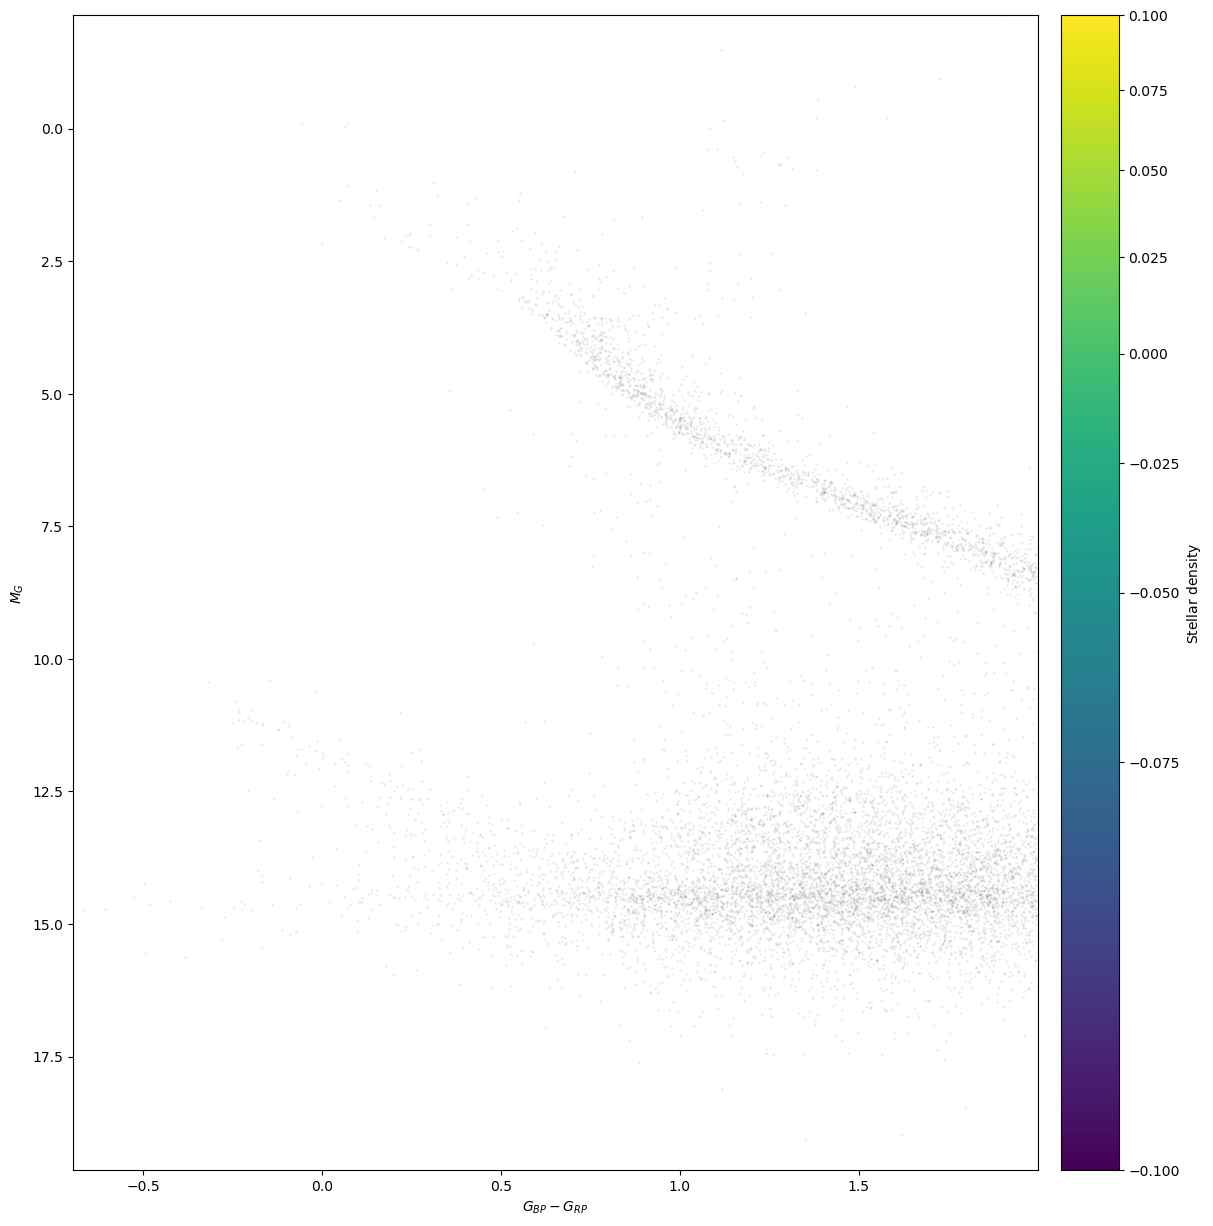

In [26]:
# plot the H-R diagram for the 5000 stars within 200 pc from the Sun
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rc('text', usetex=False)

fig, ax = plt.subplots(figsize=(15, 15))
# only show 2D-histogram for bins with more than 10 stars in them
h = ax.hist2d(bp_rp, mg, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(bp_rp, mg, alpha=0.05, s=1, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$M_G$')
cb.set_label(r"$\mathrm{Stellar~density}$")
plt.savefig(f"{small_datafile_name}.png", dpi=140)

In [27]:
# Here I am redefining the send_radial_gaia_query function with a lot more filters!
def send_radial_gaia_query(query_size=500, distance=200, **kwargs):
    """
    Sends an archive query for d < 200 pc, with additional filters taken from
    Gaia Data Release 2: Observational Hertzsprung-Russell diagrams (Sect. 2.1)
    Gaia Collaboration, Babusiaux et al. (2018)
    (https://doi.org/10.1051/0004-6361/201832843)

    NOTE: 10000000 is a maximum query size (~76 MB / column)

    Additional keyword arguments are passed to TapPlus.launch_job_async method.
    """
    #from astroquery.utils.tap.core import TapPlus
    from astroquery.gaia import Gaia

    #gaia = TapPlus(url="http://gea.esac.esa.int/tap-server/tap")

    job = Gaia.launch_job_async("select top {}".format(query_size)+
                " lum_val, teff_val,"
                " ra, dec, parallax,"
#                " bp_rp, phot_g_mean_mag+5*log10(parallax)-10 as mg, 1000/parallax as dist"
                " bp_rp, phot_g_mean_mag, 1000/parallax as dist"
         " from gaiadr2.gaia_source"
         " where parallax_over_error > 10"
         " and visibility_periods_used > 8"
         " and phot_g_mean_flux_over_error > 50"
         " and phot_bp_mean_flux_over_error > 20"
         " and phot_rp_mean_flux_over_error > 20"
#         " and phot_bp_rp_excess_factor <"
#            " 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
#         " and phot_bp_rp_excess_factor >"
#            " 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
#         " and astrometric_chi2_al/(astrometric_n_good_obs_al-5)<"
#            "1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))"
         +" and 1000/parallax <= {}".format(distance), **kwargs)

    return job

In [ ]:
# Here I am defining a new job for the same asynchronous within the try-except block
# This time for 5000 stars now including the filters
# This will first look for a previoysly stored file (try-block)
# if it does not exist it will execute the query (except-bloclk)
import numpy as np
from astropy import log

# the query runs for a while, better ensure we have those data saved
num_stars = 100000
large_datafile_name = data_folder+"/gaia-hrd-dr2-200pc_%d_stars.csv" % (num_stars)
try:
    log.info(f"Getting the DR2 results on nearby (d < 200 pc) stars stored in {large_datafile_name}\n")
    gaiarec = np.recfromcsv(large_datafile_name)
#    bp_rp, mg, dist = gaiarec.bp_rp, gaiarec.mg, gaiarec.dist
#    print(f"reading OLD results from previously existng {small_datafile_name}\n")
#    print(bp_rp, mg, dist)    
    bp_rp, photmg, dist, plx = gaiarec.bp_rp, gaiarec.phot_g_mean_mag, gaiarec.dist, gaiarec.parallax
    print(f"reading OLD results from previously existng {small_datafile_name}\n")
    mg = photmg+5*np.log10(plx)-10
    print(bp_rp, mg, dist)
except OSError:
    job = send_radial_gaia_query(dump_to_file=True, output_format="csv"
                                 ,output_file=large_datafile_name
                                 ,query_size=num_stars
    )
    r = job.get_results()
    plx = results['parallax'].data
#    mg = results['mg'].data
    mg = results['phot_g_mean_mag']+5*np.log10(plx)-10
    dist = results['dist'].data
    print(f"querying and saving NEW results to {small_datafile_name}\n")
    print(bp_rp, mg, dist)
#    bp_rp = r['bp_rp'].data
#    mg = r['mg'].data
#    dist = r['dist'].data
#    print(f"querying and saving NEW results to {large_datafile_name}\n")
#    print(bp_rp, mg, dist)

INFO: Getting the DR2 results on nearby (d < 200 pc) stars stored in data_folder/gaia-hrd-dr2-200pc_100000_stars.csv
 [unknown]


In [ ]:
!ls -ltr {data_folder}

In [ ]:
# plot the H-R diagram for stars within 200 pc from the Sun
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rc('text', usetex=False)

fig, ax = plt.subplots(figsize=(15, 15))
# only show 2D-histogram for bins with more than 10 stars in them
h = ax.hist2d(bp_rp, mg, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(bp_rp, mg, alpha=0.05, s=1, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$M_G$')
cb.set_label(r"$\mathrm{Stellar~density}$")
plt.savefig(f"{large_datafile_name}.png", dpi=140)